# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

2025-11-22 18:50:47.007366: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-11-22 18:50:47.007417: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-11-22 18:50:47.007420: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.72 GB
2025-11-22 18:50:47.007453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-22 18:50:47.007467: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

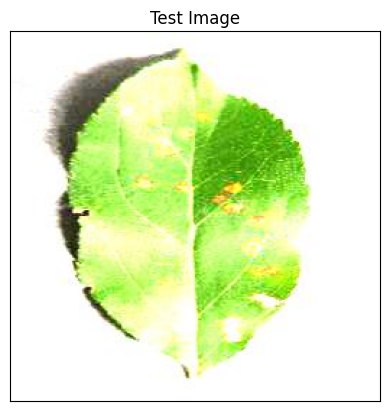

In [4]:
#Test Image Visualization
import cv2
image_path = 'dataset/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2025-11-22 18:51:00.398522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [6]:
print(predictions)

[[2.1835821e-17 1.7281289e-22 1.0000000e+00 2.9485076e-22 1.8683549e-13
  1.8540731e-17 1.6850495e-27 2.1011811e-24 3.9901092e-32 1.5157030e-28
  1.4389091e-35 3.0351899e-25 9.8879463e-31 4.3286973e-31 4.3923789e-28
  1.1933461e-16 5.4181215e-18 7.8245067e-26 4.7801891e-22 7.7815858e-18
  8.2045994e-29 4.8003240e-23 1.6815597e-23 1.2552702e-25 1.0351406e-32
  3.3236983e-27 3.1635837e-25 1.7072766e-25 1.5003038e-20 4.8329796e-21
  3.6273105e-09 1.0614176e-21 4.2526167e-19 1.4060674e-24 8.2285207e-20
  1.7119878e-22 3.4171448e-23 1.3514420e-19]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


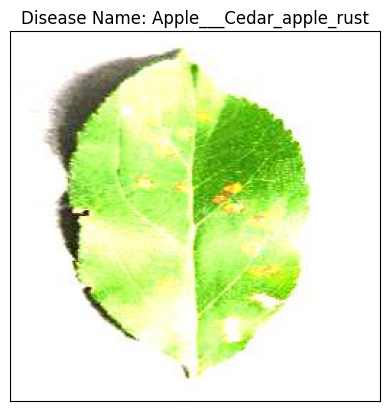

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()